# Work with the Survey Manager

<div class="alert alert-block alert-info">This notebook uses the ArcGIS API for Python. For more information, see the <a href="https://developers.arcgis.com/python/">ArcGIS API for Python documentation and guides</a>.</div>

As a survey owner, you may want to work with your ArcGIS Survey123 surveys via the ArcGIS API for Python to automate certain tasks, modify your surveys, or work with your surveys' data. This notebook demonstrates the different workflows for connecting to your surveys using the ArcGIS API for Python.

The first way uses the form item's ID which is more precise and allows you to quickly get up and running with a specific survey. The second method shown performs a search against your content to identify form items. This method would be beneficial if you are looking to work with multiple surveys as a list. You can modify the search parameters to refine the list and only work with surveys that meet a specific criteria.   

In [1]:
import arcgis
from arcgis.gis import GIS
gis = GIS("home")

### Define a Survey Manager

Next, a Survey Manager is defined, a survey in the Survey Manager is a single instance of a survey project that contains the item information and properties and provides access to the underlying survey dataset. For more information on Survey Manager, see the <a href="https://developers.arcgis.com/python/api-reference/arcgis.apps.survey123.html#arcgis.apps.survey123.SurveyManager" target="_blank">API Reference for the ArcGIS API for Python</a>.

The code block below extracts all surveys in the Survey Manager as a list. The final statement prints the title for all surveys in the Survey Manager. The `'title'` property can be updated with any of the properties outlined in the <a href="#get-survey-by-item">Get survey by item</a> section, below.

In [2]:
survey_manager = arcgis.apps.survey123.SurveyManager(gis)
surveys = survey_manager.surveys
p = [print(s.properties['title']) for s in surveys]

NIIT Reverse Geocode
NIIT Pre Enumeration Survey
schools
Pre-Enumeration Survey
Water Leak Report


### Get a survey

There are two ways you can retrieve a survey:
1. Use the Survey Manager to get a survey using its item ID.
2. Use the GIS Content Manager to search for a survey.

#### Get survey by item ID

If one survey is of interest, you can use the `get` method to define a specific survey using the form's item ID. Using the `properties` method you can extract all, or specific properties associated with the form item.

In [3]:
survey_by_id = survey_manager.get("9f01838a15594cfdbb2eb69fafb60d75")
print(survey_by_id)
print(survey_by_id.properties['title'])

<Survey @ Water Quality Inspection>
Water Quality Inspection


#### Get survey by content search

The code below uses the <a href="https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html?#contentmanager" target="_blank">GIS Content Manager</a> to search for a survey by owner. Returning the `forms` variable lists all the items identified (default is 10).

In [4]:
forms = gis.content.search('type:form owner:NinjaGreen')
forms

[<Item title:"NIIT Reverse Geocode" type:Form owner:NinjaGreen>,
 <Item title:"NIIT Pre Enumeration Survey" type:Form owner:NinjaGreen>,
 <Item title:"schools" type:Form owner:NinjaGreen>,
 <Item title:"Pre-Enumeration Survey" type:Form owner:NinjaGreen>,
 <Item title:"Water Leak Report" type:Form owner:NinjaGreen>,
 <Item title:"UC 2019 User Notes" type:Form owner:NinjaGreen>,
 <Item title:"Quick Tree Hazard Survey" type:Form owner:NinjaGreen>,
 <Item title:"Water Station Editing Example" type:Form owner:NinjaGreen>,
 <Item title:"Transmission Tower" type:Form owner:NinjaGreen>,
 <Item title:"Incident Report" type:Form owner:NinjaGreen>]

Using the `get` method you can extract a specific survey of interest using the index, and continue working with that object.   The ninth result, index 8, is then extracted from the results and the properties are returned.

In [5]:
survey_by_item = survey_manager.get(forms[8])
print(survey_by_item.properties)

{'id': '580747564c474cda835a918d0f97fa9a', 'owner': 'NinjaGreen', 'created': 1617153016000, 'isOrgItem': True, 'modified': 1617153016000, 'guid': None, 'name': 'Transmission_Tower.zip', 'title': 'Transmission Tower', 'type': 'Form', 'typeKeywords': ['Form', 'Survey123', 'Survey123 Connect', 'xForm'], 'description': 'Document transmission tower defects observed during routine inspections. This survey uses text, photos, sketches and annotation to capture details about defects.', 'tags': [], 'snippet': 'Record transmission tower defects', 'thumbnail': 'thumbnail/Transmission_Tower_Inspection.png', 'documentation': None, 'extent': [], 'categories': [], 'spatialReference': None, 'accessInformation': None, 'licenseInfo': None, 'culture': 'en-us', 'properties': None, 'url': None, 'proxyFilter': None, 'access': 'private', 'size': 103519, 'subInfo': 0, 'appCategories': [], 'industries': [], 'languages': [], 'largeThumbnail': None, 'banner': None, 'screenshots': [], 'listed': False, 'ownerFolder

Now that a survey has been identified from the Survey Manager let's do something with it. The code below creates a web map, specifies a basemap, and sets a default map scale. 

Using the survey identified previously, the survey's form item is obtained using the `get` method and its item ID. Next, the associated feature service is obtained and added to the web map. 

Finally, the web map with the survey data is displayed directly within the notebook. 

In [6]:
survey_webmap = gis.map('Maryland')
survey_webmap.basemap = 'dark-gray'
survey_webmap.zoom = 8
survey_service = gis.content.get(survey_by_item.properties['id'])
survey_webmap.add_layer(survey_service.related_items('Survey2Service','forward')[0])
survey_webmap

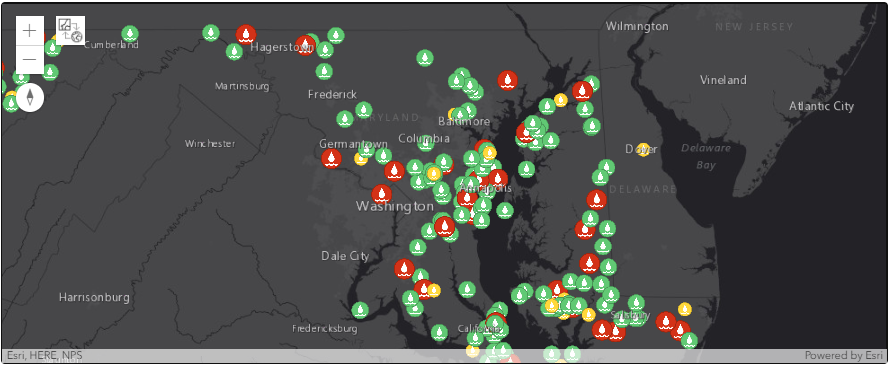